# Approach To The Problem


1. Load the data and libraries
2.  Data Preparation and Transformation
3.  Visualization
4.   Analysis
  1.  Uni-Variate
  2.  Bi-Variate
  3.  Multi-Variate
5. Model Selection
  1. Supervised
    1. Classification: Y is discrete (0/1)
    2. Regression: Y is continuous
  2. Unsupervised
6. Decision Tree
7. Random Forest
8. Evaluation on Test Dataset


# Load Data And Libraries

STEP-1 :-
  Load the libraries

In [ ]:
# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import chi2_contingency
# Decision Tree And Random Forest
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor

Load the Data

In [ ]:
train = pd.read_csv('/content/train_v9rqX0R.csv')
test  = pd.read_csv('/content/test_AbJTz2l.csv')

STEP 3 :- Audit the data

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [ ]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Exploratory Data Analysis

## Univariate Analysis


Exploratory Data Analysis (univariate and bivariate)

In [ ]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
train.skew()

<ipython-input-7-1d3a3c99b9d6>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.skew()


Item_Weight                  0.082426
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

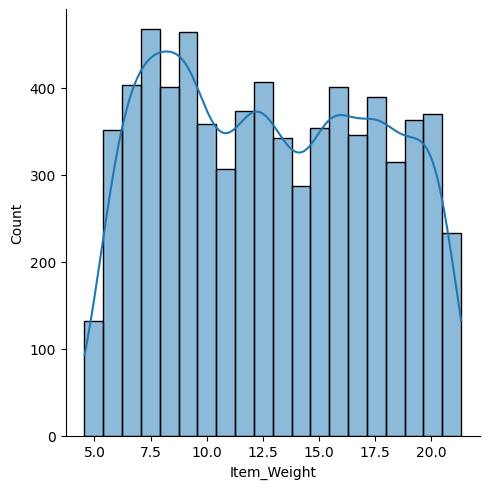

In [ ]:
sns.displot(train['Item_Weight'], kde= True)

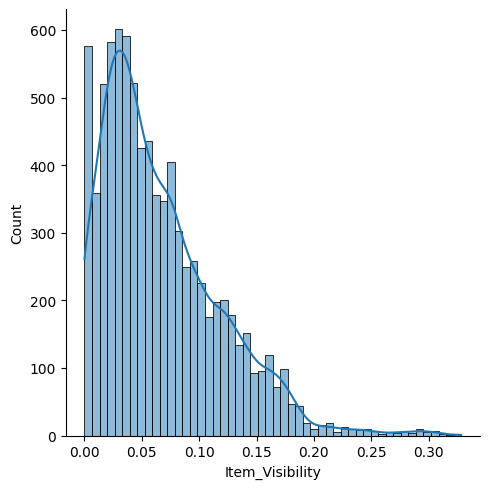

In [ ]:
sns.displot(train["Item_Visibility"], kde=True)

<Axes: ylabel='Item_Visibility'>

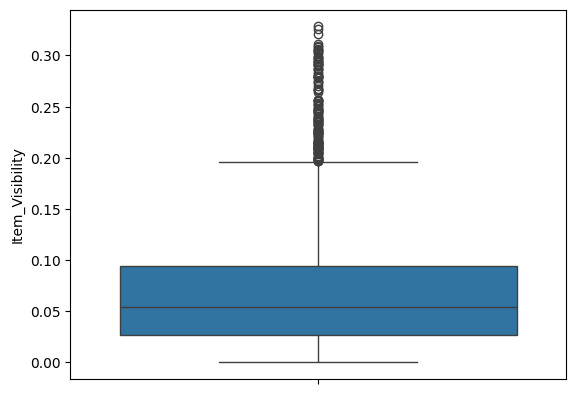

In [ ]:
sns.boxplot(train['Item_Visibility'])

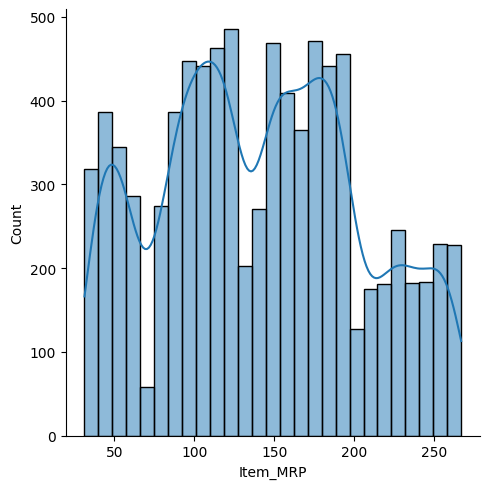

In [ ]:
sns.displot(train['Item_MRP'], kde=True)

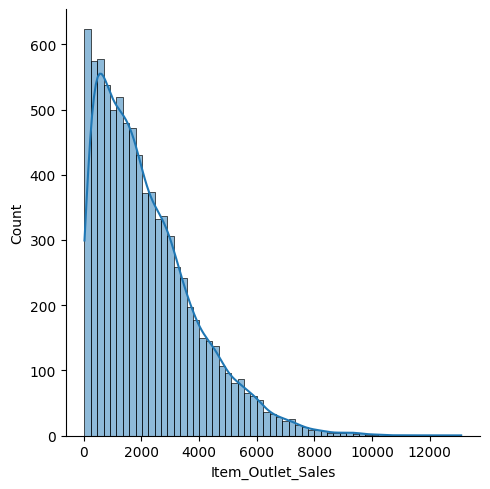

In [ ]:
sns.displot(train['Item_Outlet_Sales'],kde= True)

Evaluation of Categorical variables

<Axes: >

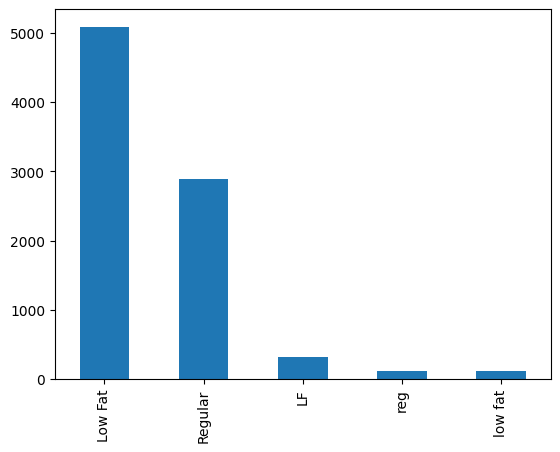

In [ ]:
train['Item_Fat_Content'].value_counts().plot(kind='bar')

<Axes: >

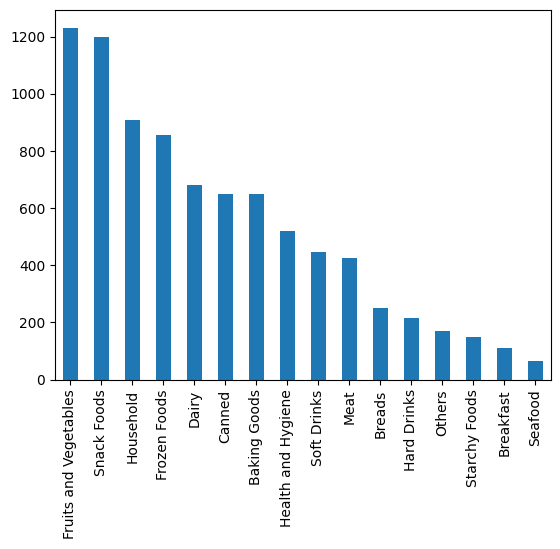

In [ ]:
train['Item_Type'].value_counts().plot(kind='bar')

<Axes: >

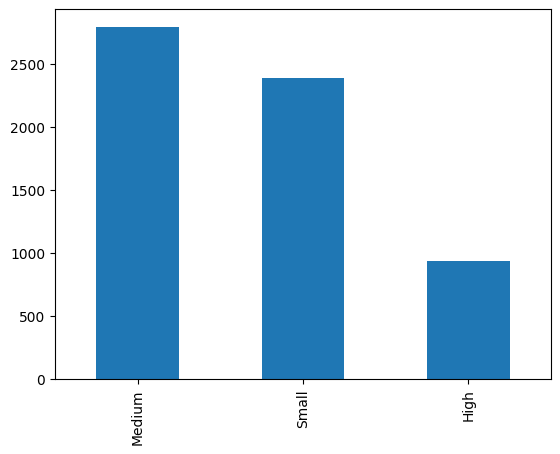

In [ ]:
train['Outlet_Size'].value_counts().plot(kind='bar')

<Axes: >

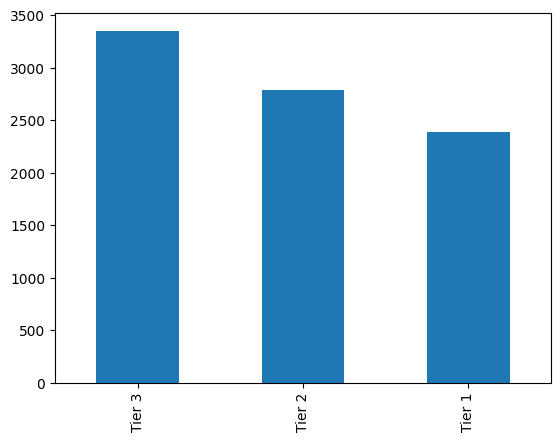

In [ ]:
train['Outlet_Location_Type'].value_counts().plot(kind='bar')

<Axes: >

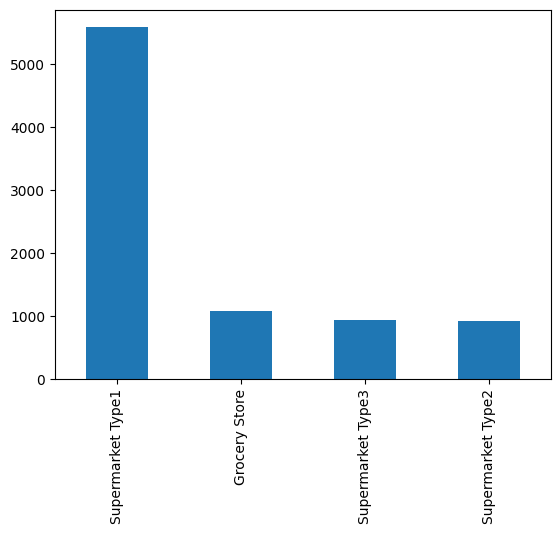

In [ ]:
train['Outlet_Type'].value_counts().plot(kind='bar')

## BiVariate Analysis

<ipython-input-18-d3bcf4a68d96>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot= True)


<Axes: >

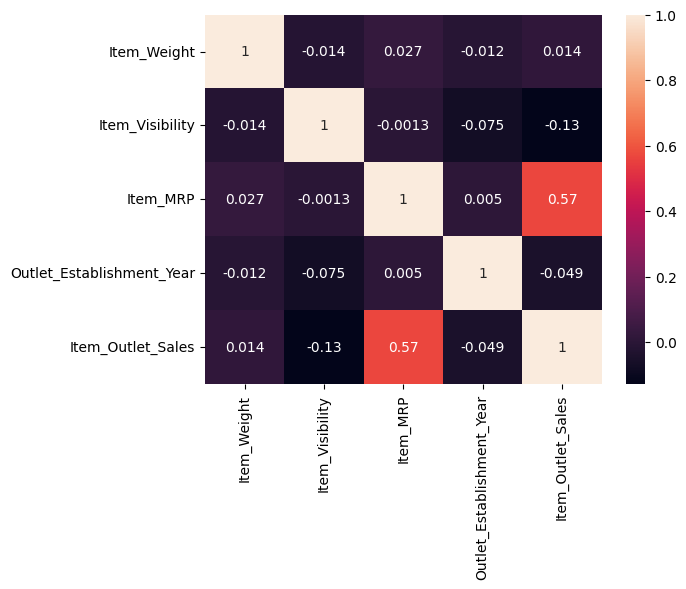

In [ ]:
sns.heatmap(train.corr(), annot= True)

Chi Square Test


In [ ]:
train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
train['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [ ]:
pd.crosstab(train['Outlet_Size'],train['Outlet_Location_Type'])

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,,,
High,0,0,932
Medium,930,0,1863
Small,1458,930,0




*   Null Hypothesis: Outlet_Location_Type & OutLet_Size are independent
*   Alternate Hypothesis: Outlet_Location_Type & Outlet_Size are dependant

Contingency Table = CrossTab



In [ ]:
def chi2_sq_test(var1,var2):
  contingency_table=pd.crosstab(var1,var2)
  _,pvalue,_,_=chi2_contingency(contingency_table)
  if pvalue < 0.05 :
    print("Accept the Alternative Hypothesis", round(pvalue,2))
  else:
    print("Do Not Accept the Alternative Hypothesis", round(pvalue,2))
  return contingency_table

In [ ]:
chi2_sq_test(train['Outlet_Size'],train['Outlet_Location_Type'])

Accept the Alternative Hypothesis 0.0


Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,,,
High,0,0,932
Medium,930,0,1863
Small,1458,930,0


In [ ]:
chi2_sq_test(train['Item_Type'],train['Outlet_Type'])

Do Not Accept the Alternative Hypothesis 1.0


Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Item_Type,,,,
Baking Goods,85,426,68,69
Breads,33,160,27,31
Breakfast,19,68,12,11
Canned,73,426,78,72
Dairy,92,450,73,67
Frozen Foods,103,572,92,89
Fruits and Vegetables,152,805,135,140
Hard Drinks,24,145,22,23
Health and Hygiene,67,335,58,60


In [ ]:
chi2_sq_test(train['Item_Type'],train['Outlet_Location_Type'])

Do Not Accept the Alternative Hypothesis 1.0


Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Item_Type,,,
Baking Goods,185,211,252
Breads,67,84,100
Breakfast,33,32,45
Canned,177,222,250
Dairy,205,214,263
Frozen Foods,250,279,327
Fruits and Vegetables,337,399,496
Hard Drinks,58,72,84
Health and Hygiene,138,166,216


In [ ]:
chi2_sq_test(train['Item_Type'],train['Item_Fat_Content'])

Accept the Alternative Hypothesis 0.0


Item_Fat_Content,LF,Low Fat,Regular,low fat,reg
Item_Type,,,,,
Baking Goods,20,301,306,8,13
Breads,8,126,108,6,3
Breakfast,2,39,67,0,2
Canned,17,314,297,10,11
Dairy,24,382,258,12,6
Frozen Foods,22,424,387,4,19
Fruits and Vegetables,39,580,577,11,25
Hard Drinks,8,199,0,7,0
Health and Hygiene,29,481,0,10,0


In [ ]:
chi2_sq_test(train['Outlet_Type'],train['Item_Fat_Content'])

Do Not Accept the Alternative Hypothesis 0.41


Item_Fat_Content,LF,Low Fat,Regular,low fat,reg
Outlet_Type,,,,,
Grocery Store,45,642,364,18,14
Supermarket Type1,192,3347,1889,70,79
Supermarket Type2,42,547,312,9,18
Supermarket Type3,37,553,324,15,6


In [ ]:
chi2_sq_test(train['Outlet_Location_Type'],train['Item_Fat_Content'])

Do Not Accept the Alternative Hypothesis 0.92


Item_Fat_Content,LF,Low Fat,Regular,low fat,reg
Outlet_Location_Type,,,,,
Tier 1,84,1426,813,30,35
Tier 2,95,1679,940,35,36
Tier 3,137,1984,1136,47,46


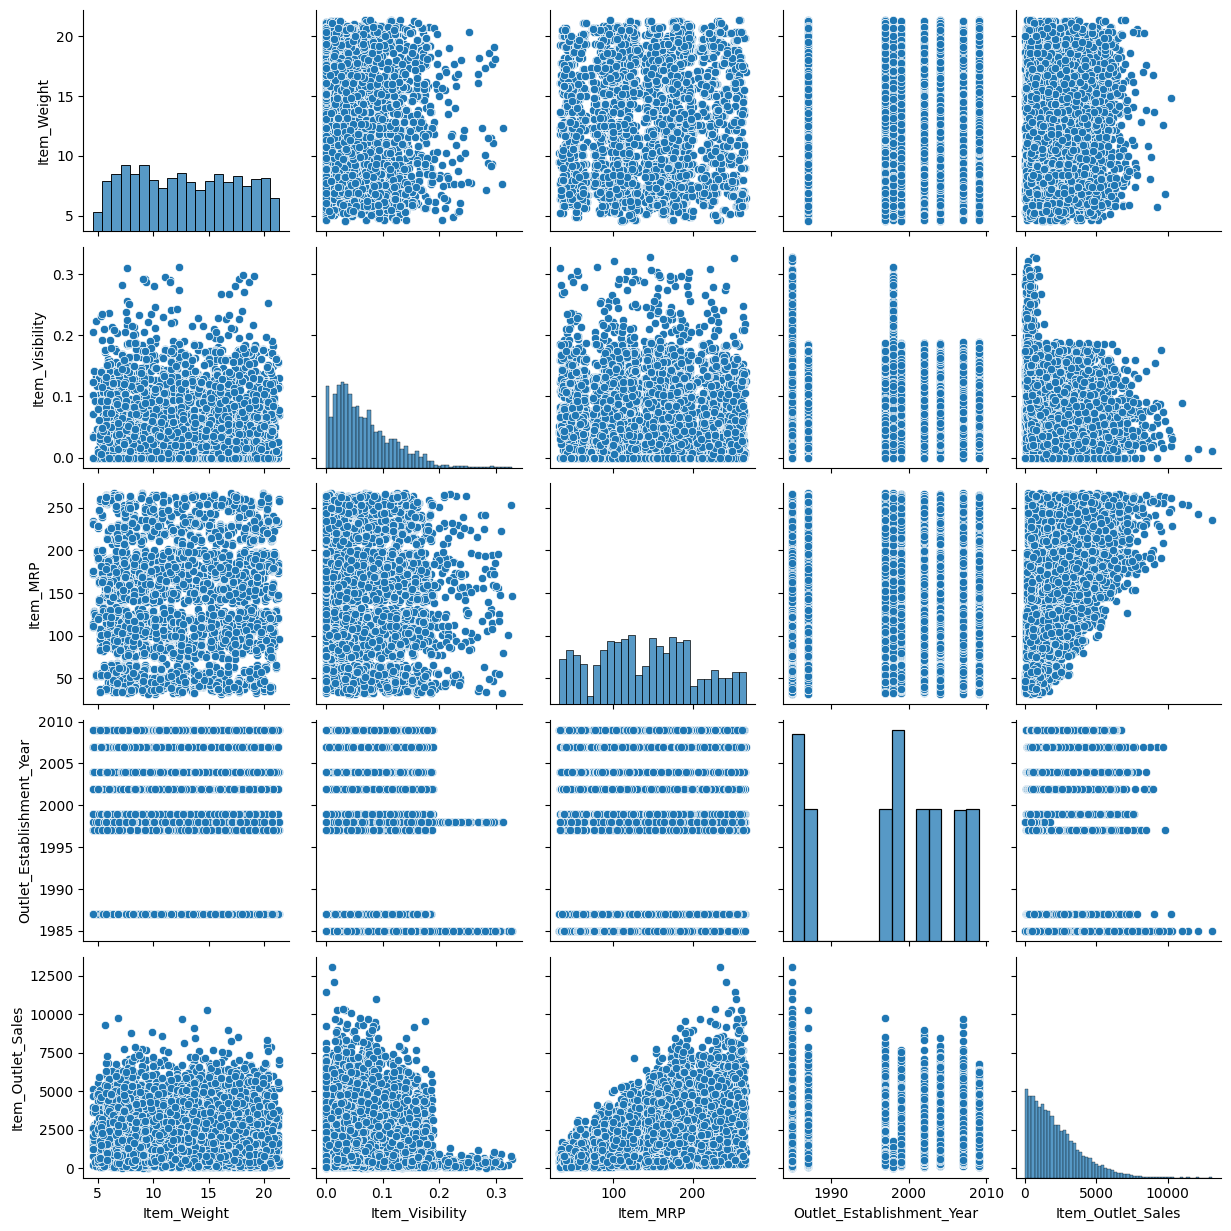

In [ ]:
sns.pairplot(train)

# Data Preparation

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
def data_prep(data):
  #Impute Missing Values
  data['Item_Weight'] = np.where(data['Item_Weight'].isna(),
                                 data['Item_Weight'].median(skipna=True),data['Item_Weight'])
  data['Outlet_Size'] = np.where(data['Outlet_Size'].isna(),
                                 data['Outlet_Size'].mode(dropna = True)[0], data['Outlet_Size'])

  #Handle Inconsistent Values
  data['Item_Fat_Content'].replace(['low fat', 'LF'], 'Low Fat', inplace = True)
  data['Item_Fat_Content'].replace('reg', 'Regular', inplace = True)
  data['Years_Of_Business'] = 2024 - data['Outlet_Establishment_Year']

  #Remove Unwanted Columns
  data.drop(['Item_Identifier','Outlet_Identifier', 'Outlet_Establishment_Year'], inplace = True, axis=1)
  return data

In [ ]:
data_prep(train)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Of_Business
0,9.300,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,25
1,5.920,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,15
2,17.500,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,25
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,Medium,Tier 3,Grocery Store,732.3800,26
4,8.930,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052,37
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,High,Tier 3,Supermarket Type1,2778.3834,37
8519,8.380,Regular,0.046982,Baking Goods,108.1570,Medium,Tier 2,Supermarket Type1,549.2850,22
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,Small,Tier 2,Supermarket Type1,1193.1136,20
8521,7.210,Regular,0.145221,Snack Foods,103.1332,Medium,Tier 3,Supermarket Type2,1845.5976,15


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           8523 non-null   float64
 1   Item_Fat_Content      8523 non-null   object 
 2   Item_Visibility       8523 non-null   float64
 3   Item_Type             8523 non-null   object 
 4   Item_MRP              8523 non-null   float64
 5   Outlet_Size           8523 non-null   object 
 6   Outlet_Location_Type  8523 non-null   object 
 7   Outlet_Type           8523 non-null   object 
 8   Item_Outlet_Sales     8523 non-null   float64
 9   Years_Of_Business     8523 non-null   int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


**Objects Cannot be READ by Model**



*   Label Encoder
*   One Hot Encoder



# Encoding

In [ ]:
train_enc = pd.get_dummies(train)

In [ ]:
train_enc.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Years_Of_Business,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,3735.1380,25,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,443.4228,15,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,2097.2700,25,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,732.3800,26,0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,994.7052,37,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [ ]:
train_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      8523 non-null   float64
 1   Item_Visibility                  8523 non-null   float64
 2   Item_MRP                         8523 non-null   float64
 3   Item_Outlet_Sales                8523 non-null   float64
 4   Years_Of_Business                8523 non-null   int64  
 5   Item_Fat_Content_Low Fat         8523 non-null   uint8  
 6   Item_Fat_Content_Regular         8523 non-null   uint8  
 7   Item_Type_Baking Goods           8523 non-null   uint8  
 8   Item_Type_Breads                 8523 non-null   uint8  
 9   Item_Type_Breakfast              8523 non-null   uint8  
 10  Item_Type_Canned                 8523 non-null   uint8  
 11  Item_Type_Dairy                  8523 non-null   uint8  
 12  Item_Type_Frozen Foo

# Splitting Of Data

Divide the data into X and Y

In [ ]:
y = train_enc['Item_Outlet_Sales']
x = train_enc.drop('Item_Outlet_Sales',axis=1)

In [ ]:
print(y.shape)
print(x.shape)

(8523,)
(8523, 32)


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2 , random_state =42)

In [ ]:
#If we do get any NaN value error in the model making time we will use these commands

#X_train['Item_Weight'] = np.where(X_train['Item_Weight'].isna(), X_train['Item_Weight'].median(skipna = True), X_train['Item_Weight'])
#X_test['Item_Weight'] = np.where(X_test['Item_Weight'].isna(), X_test['Item_Weight'].median(skipna = True), X_test['Item_Weight'])

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6818, 32)
(1705, 32)
(6818,)
(1705,)


# Multi-Variate Model


In [ ]:
lr = LinearRegression()
lr.fit(X_train , y_train)

LinearRegression()

In [ ]:
print(lr.intercept_)

1217.5862165082249


In [ ]:
print(lr.coef_)

[-1.73786670e+00 -4.66464698e+02  1.56624763e+01 -3.28994162e+01
 -2.23288378e+01  2.23288378e+01 -1.31693821e+01 -3.63334790e+01
  5.91638337e+01  1.36335115e+01 -1.01780812e+02 -2.49949718e+01
  3.38884834e+01 -2.45669492e+00  1.16618364e+00 -2.73139373e+01
 -1.15910604e+01 -5.93672520e+01  2.18349543e+02 -2.08138304e+01
 -4.13231044e+01  1.29429690e+01  5.34210407e+02 -2.95599068e+02
 -2.38611340e+02  1.95095320e+02  1.54227017e+01 -2.10518022e+02
 -1.64674691e+03 -1.24574556e+02 -3.70270288e+02  2.14159175e+03]


In [ ]:
for coef, feature in zip(lr.coef_, X_train.columns):
    print(f"{feature}: {coef:.4f}")  # Format to 4 decimal places

Item_Weight: -1.7379
Item_Visibility: -466.4647
Item_MRP: 15.6625
Years_Of_Business: -32.8994
Item_Fat_Content_Low Fat: -22.3288
Item_Fat_Content_Regular: 22.3288
Item_Type_Baking Goods: -13.1694
Item_Type_Breads: -36.3335
Item_Type_Breakfast: 59.1638
Item_Type_Canned: 13.6335
Item_Type_Dairy: -101.7808
Item_Type_Frozen Foods: -24.9950
Item_Type_Fruits and Vegetables: 33.8885
Item_Type_Hard Drinks: -2.4567
Item_Type_Health and Hygiene: 1.1662
Item_Type_Household: -27.3139
Item_Type_Meat: -11.5911
Item_Type_Others: -59.3673
Item_Type_Seafood: 218.3495
Item_Type_Snack Foods: -20.8138
Item_Type_Soft Drinks: -41.3231
Item_Type_Starchy Foods: 12.9430
Outlet_Size_High: 534.2104
Outlet_Size_Medium: -295.5991
Outlet_Size_Small: -238.6113
Outlet_Location_Type_Tier 1: 195.0953
Outlet_Location_Type_Tier 2: 15.4227
Outlet_Location_Type_Tier 3: -210.5180
Outlet_Type_Grocery Store: -1646.7469
Outlet_Type_Supermarket Type1: -124.5746
Outlet_Type_Supermarket Type2: -370.2703
Outlet_Type_Supermarket Ty

In [ ]:
y_hat_train = lr.predict(X_train)
y_hat_test = lr.predict(X_test)

In [ ]:
y_hat_train

array([2876.9916689 , 2657.0923847 , 1855.66956328, ..., 3746.09218828,
       1997.01451142, 1574.7689201 ])

In [ ]:
y_hat_test

array([1359.05604052,  762.00752867,  820.0497195 , ...,  849.4987853 ,
        564.94626843, 1713.02525555])

In [ ]:
rmse_train =np.sqrt( mean_squared_error(y_train , y_hat_train))
print("The RMSE for the train is:", round(rmse_train,2))

The RMSE for the train is: 1142.08


In [ ]:
rmse_test =np.sqrt( mean_squared_error(y_test , y_hat_test))
print("The RMSE for the test is:", round(rmse_test,2))

The RMSE for the test is: 1068.94


In [ ]:
r2_score_train =(r2_score(y_train , y_hat_train))
print("The R2 score for the model is:", round(r2_score_train,2))

The R2 score for the model is: 0.56


In [ ]:
r2_score_test =(r2_score(y_test , y_hat_test))
print("The R2 score for the model is:", round(r2_score_test,2))

The R2 score for the model is: 0.58


# Decision Tree Regressor


In [ ]:
dtree = DecisionTreeRegressor(max_depth = 3 )

#fit The Model
dtree.fit(X_train , y_train)

DecisionTreeRegressor(max_depth=3)

In [ ]:
y_hat_train_dtree = dtree.predict(X_train)
y_hat_test_dtree = dtree.predict(X_test)

In [ ]:
def model_eval_train(actual , predicted):
  rmse_train =np.sqrt( mean_squared_error(actual , predicted))
  r2_score_train = (r2_score(actual , predicted))
  print("The RMSE for the train dataset :" ,round(rmse_train ,2))
  print("The R2 score for the train dataset:" , round(r2_score_train, 2))

def model_eval_test(actual , predicted):
  rmse_test = np.sqrt( mean_squared_error(actual , predicted))
  r2_score_test = (r2_score(actual , predicted))
  print("The RMSE for the test dataset :" , round(rmse_test,2))
  print("The R2 score for the test dataset:" , round(r2_score_test,2))

In [ ]:
model_eval_train(y_train , y_hat_train_dtree)
print("\n")
model_eval_test(y_test , y_hat_test_dtree)

The RMSE for the train dataset : 1189.21
The R2 score for the train dataset: 0.52


The RMSE for the test dataset : 1122.47
The R2 score for the test dataset: 0.54


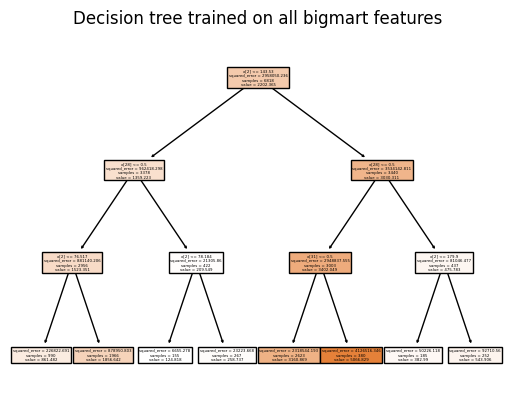

In [ ]:
plt.figure()
clf = DecisionTreeRegressor(max_depth = 3).fit(X_train, y_train)
plot_tree(clf, filled=True)
plt.title("Decision tree trained on all bigmart features")
plt.show()

In [ ]:
pd.DataFrame({'col_name': dtree.feature_importances_}, index=x.columns).sort_values(by='col_name', ascending=False)

,col_name
Item_MRP,0.514548
Outlet_Type_Grocery Store,0.370902
Years_Of_Business,0.114550
Item_Weight,0.000000
Outlet_Size_Small,0.000000
Item_Type_Snack Foods,0.000000
Item_Type_Soft Drinks,0.000000
Item_Type_Starchy Foods,0.000000
Outlet_Size_High,0.000000
Outlet_Size_Medium,0.000000


# Random Forest Regressor

In [ ]:
rf = RandomForestRegressor(n_estimators = 100 , max_depth = 3)

#Fit the Model
rf.fit(X_train , y_train)

RandomForestRegressor(max_depth=3)

In [ ]:
y_hat_train_rf = rf.predict(X_train)
y_hat_test_rf = rf.predict(X_test)

In [ ]:
model_eval_train(y_train , y_hat_train_rf)
print('\n')
model_eval_test(y_test , y_hat_test_rf)

The RMSE for the train dataset : 1162.14
The R2 score for the train dataset: 0.54


The RMSE for the test dataset : 1095.44
The R2 score for the test dataset: 0.56


# Application On Test Dataset

In [ ]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [ ]:
data_prep(test)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Years_Of_Business
0,20.750,Low Fat,0.007565,Snack Foods,107.8622,Medium,Tier 1,Supermarket Type1,25
1,8.300,Regular,0.038428,Dairy,87.3198,Medium,Tier 2,Supermarket Type1,17
2,14.600,Low Fat,0.099575,Others,241.7538,Medium,Tier 3,Grocery Store,26
3,7.315,Low Fat,0.015388,Snack Foods,155.0340,Medium,Tier 2,Supermarket Type1,17
4,12.500,Regular,0.118599,Dairy,234.2300,Medium,Tier 3,Supermarket Type3,39
...,...,...,...,...,...,...,...,...,...
5676,10.500,Regular,0.013496,Snack Foods,141.3154,Small,Tier 1,Supermarket Type1,27
5677,7.600,Regular,0.142991,Starchy Foods,169.1448,Medium,Tier 3,Supermarket Type2,15
5678,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,Medium,Tier 2,Supermarket Type1,22
5679,15.300,Regular,0.000000,Canned,214.6218,Medium,Tier 2,Supermarket Type1,17


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           5681 non-null   float64
 1   Item_Fat_Content      5681 non-null   object 
 2   Item_Visibility       5681 non-null   float64
 3   Item_Type             5681 non-null   object 
 4   Item_MRP              5681 non-null   float64
 5   Outlet_Size           5681 non-null   object 
 6   Outlet_Location_Type  5681 non-null   object 
 7   Outlet_Type           5681 non-null   object 
 8   Years_Of_Business     5681 non-null   int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 399.6+ KB


In [ ]:
test_enc = pd.get_dummies(test)

In [ ]:
test_preds = lr.predict(test_enc)

In [ ]:
test_preds

array([1776.67952645, 1509.38809417, 1842.28343379, ..., 1876.03342342,
       3624.42706178, 1309.45545811])

# Submission

In [ ]:
submission = pd.read_csv('/content/sample_submission_8RXa3c6.csv')

In [ ]:
submission.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000


In [ ]:
submission['Item_Outlet_Sales'] = np.abs(test_preds)

In [ ]:
submission.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1776.679526
1,FDW14,OUT017,1509.388094
2,NCN55,OUT010,1842.283434
3,FDQ58,OUT017,2618.728263
4,FDY38,OUT027,5082.107770


In [ ]:
submission.to_csv('Final_submission.csv' , index = False)